# KNN
- O que é o KNN?
    
    O algoritmo **KNN** (`K-nearest neighbors`, ou `“K-vizinhos mais próximos”`) é um dos algoritmos mais utilizados em modelos de Machine Learning e, também é um dos mais simples e de fácil implementação, pode ser usado tanto para classificação como para regressão.

Ao contrário dos outros algoritmos ele não constrói um modelo (como por exemplo o Naive Bayes, onde ele analisa os dados é gera um modelo que será uma tabela de probabilidades), o KNN faz somente o cálculo de distância entre dois ou mais pontos. Por conta dessa característica peculiar, ele é considerado um método do tipo preguiçoso (lazy).

Portando ele tem como objetivo determinar a qual grupo uma determinada amostra vai pertencer com base nas amostras vizinhas. Para isso, ele utiliza o método matemático da `distância euclidiana`, descrita pela fórmula a seguir:

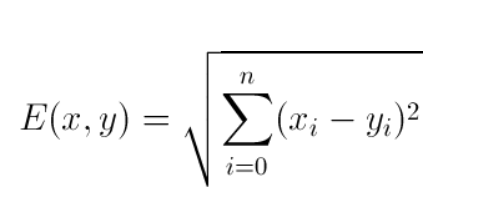

  **"Distância euclidiana (ou distância métrica) é a distância entre dois pontos, que pode ser provada pela aplicação repetida do teorema de Pitágoras. Aplicando essa fórmula como distância, o espaço euclidiano torna-se um espaço métrico."**

fonte: https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana

Para melhor entendimento, veja a figura abaixo.

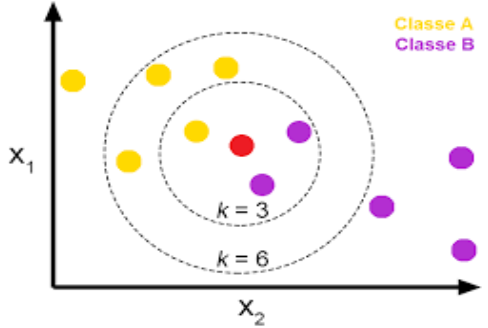

No exemplo acima temos 5 registros da classe A e 5 registros da classe B, o objetivo é saber a qual classe o novo registro (bolinha vermelha) vai pertencer.

Com este novo dado ele irar calcular a distância do mesmo com todas as amostras da base de dados de treinamento. Para isto, é necessário especificar uma valor para o parâmetro **K**, ou seja, o número de vizinhos que serã comparados. Como exemplo inicial temos `k = 3`,onde ele irar somente utilizar três amostras mais próximas para fazer a comparação.

Para este exemplo exemplo, temos como resultado:
 - dois são da classe B e somente um da classe A, portanto como existem mais vizinhos da classe B, esse novo registro pertencerá a classe B.

E se aumentarmos o nosso `k = 6`, já o resultado é:
- temos quatro registros da classe A e, dois registros da B, esse novo registro pertenecerá a classe A.

 
Tem aplicabilidade nos mais diversos segmentos de negócios, podendo ser utilizado para soluções de problemas nas áreas como finanças, saúde, ciência política, reconhecimento de imagem e reconhecimento de vídeos e etc.

Por exemplo na classificação a máquina irá dizer a que grupo determinado registro faz parte, dentro de um contexto de negócio. Já para a regressão irá nos fornecer um número/valor, por exemplo o valor de mercado de uma determinada casa que irá ser colocada a venda. Para ambos os casos o algoritmo irá analisar diversas features (colunas com dados, as quais geraram informação).

**Vamos entender como se dá o cálculo distância euclidiana**

Dado dois numeros, **11** e **25**. Para calcular a distância entre eles, devemos subtrair `11 - 25` como resultado temos **-14**. 

Pórem temos uma distância negativa e no mundo real sabemos que não existe **distância negativa**. Para isso devemos elevar o resultado ao quadrado e pr fim extrair sua raiz quadrada.

Vamos para exemplo prático abaixo.



In [2]:
# iremos importar a biblioteca matemática "math" - para realizar cálculos matemáticos
# como por exemplo a raiz quadrada "sqrt"
import math

In [4]:
# utlizaremos os dois números acima - 11 e 25
calculo = 11 - 25
calculo

-14

In [5]:
# iremos elevar o resultado ao quadrado
# qualquer número elevado ao quadarado o seu resultado é positivo
numAoQuadrado = calculo ** 2
numAoQuadrado

196

In [7]:
# extraindo a raiz quadrado do "numAoQuadrado" e calculando a distância euclidiana
distEucliana = math.sqrt(numAoQuadrado)
distEucliana

14.0

In [11]:
# para simplificar tudo, podemos fazer da seguinte forma
dist = math.sqrt((11 - 25)**2)
dist

14.0

## Para realizar o cálculo dado mais de uma coordenada por exemplo:
 - a massa de uma fruta qualquer e seu índice de cor.

Portanto, queremos calcular um elemento que possui duas coordenadas (duas dimensões) e comparar com outra fruta.

Iremos utlizar o mesmo cálculo anterior para cada atributo diferente - massa e cor.

  - fruta 1, possui massa igual 5 e cor de 0.75;
  - fruta 2. massa igual 2 e cor 0.50



In [12]:
# iremos instanciar os dados nas variáveis a e b e em uma lista em python
a = [5,0.75]
b = [2, 0.50]

Para isso é necessário, calcularmos a distância entre os nossos atributos (massa e cor) separados e depois somar os resultados e elevando ao quadrado, posteriormente extraindo sua raiz quadrada.

    distMassa = fruta1 - fruta2
    distCor = fruta1 - fruta2

    numQuad = (distMassa + disCor) * (distMassa + disCor)

    distEucl = raizQuad(numQuad)

Segue o cálculo abaixo.

In [17]:
a = ((5 - 2) * (5 - 2))  + ((0.75 - 0.5 ) * (0.75 - 0.5)) 
math.sqrt(a)

3.010398644698074

In [13]:
# para simplificar o nosso cálculo
res = ((5-2)**2) + ((0.75-0.50)**2)
math.sqrt(res)

3.010398644698074

> ## Vamos práticar esses conceitos com aplicação do algoritmo que se encontra na biblioteca do `sklearn`

Iremos realizar essa prática para modelo de classificação.

In [18]:
# importando a biblioteca e o algoritmo
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# instanciando nosso algoritmo em uma variável
# com nosso classificador "n_neighbors=3" - três vizinhos mais próximo 
knn = KNeighborsClassifier(n_neighbors=3) 

Agora iremos instanciar um conjunto de dados de frutas.
   - `"fruit_data_with_colors.txt"`

In [52]:
# importando a biblioteca para realizar a leitura do conjunto de dados
import pandas as pd

In [66]:
# instanciando os dados na variável "data"
data = pd.read_table('fruit_data_with_colors.txt')
data.head() # visualizando as 5 primeiras linhas

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [67]:
# verificando a quantidade de linhas e colunas
data.shape

(59, 7)

Para realizar a predição iremos utilizar somente as colunas (atributos) númericas:
 - `mass,	width,	height	e color_score`

E também iremos utlizar o rótulos (labels), que nesse caso é:
 - `fruit_label`

 Para isso iremos instanciar essas nossas variáveis.

In [68]:
# instanciando os atributos na variável "X"
X = data[['mass', 'width', 'height', 'color_score']]

In [69]:
# instanciando o rótulo em "y"
y = data['fruit_label']

Agora devemos dividir os dados em treino e teste. Para isso, devemos importar o `train_test_split`

In [70]:
# importando o algoritmo
from sklearn.model_selection import train_test_split

In [71]:
# dividindo os dados em treino e teste nas variáveis
X_train, X_test, y_train, y_test = train_test_split(X, y )
# por padrão ele divide os dados em 75% para treino e 25% para teste
# e além disso a técnica "train_test_split" divide e embaralha os dados

In [72]:
# realizando o treinamento do nosso modelo
knn.fit(X_train, y_train) # valores de treino

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [73]:
# avaliando o modelo
knn.score(X_test, y_test) # acurácia das predições
# quanto mais próximo de 1, melhor é acurácia

0.7333333333333333

Para uma boa avaliação do modelo é ideal ele possuir acima de 0.7 e/ou 0.8 (70% e 80%). 

Porém o modelo possui uma valiação inferior, essa baixa avaliação talvez se deve pela escala das grandezas dos atributos. 

Para isso devemos balancear os dados (processar os dados) e para é necessário aplicar a `técnica de escalar`, iremos utilizar `MinMaxScaler` para avaliar melhor o modelo.

In [74]:
# importando o algoritmo
from sklearn.preprocessing import MinMaxScaler

In [75]:
# iremos instanciar o algoritmo na variável "mm"
mm = MinMaxScaler()

In [76]:
# iremos utilizar a tecnica nos dados de treino para transformar-los entre 0 e 1
X_train = mm.fit_transform(X_train)
X_train # observe que os dados se encontra entre 0 e 1

array([[0.3986014 , 0.44736842, 0.63076923, 0.5       ],
       [0.28671329, 0.36842105, 0.58461538, 0.57894737],
       [0.38461538, 0.36842105, 0.8       , 0.44736842],
       [0.44755245, 0.44736842, 0.8       , 0.57894737],
       [0.01398601, 0.        , 0.04615385, 0.57894737],
       [0.        , 0.        , 0.        , 0.68421053],
       [0.14685315, 0.02631579, 0.61538462, 0.44736842],
       [0.43356643, 0.39473684, 1.        , 0.44736842],
       [0.40559441, 0.68421053, 0.50769231, 0.        ],
       [0.41958042, 0.39473684, 0.87692308, 0.44736842],
       [0.48951049, 0.39473684, 0.95384615, 0.42105263],
       [0.13986014, 0.05263158, 0.53846154, 0.44736842],
       [0.27272727, 0.39473684, 0.50769231, 0.63157895],
       [0.13986014, 0.07894737, 0.69230769, 0.42105263],
       [1.        , 1.        , 0.8       , 0.5       ],
       [0.36363636, 0.57894737, 0.43076923, 0.10526316],
       [0.34265734, 0.39473684, 0.93846154, 0.44736842],
       [0.18881119, 0.05263158,

In [77]:
# realizando a transformação dos dados de teste   
X_test = mm.transform(X_test)
X_test

array([[0.13986014, 0.13157895, 0.56923077, 0.44736842],
       [0.97902098, 0.89473684, 0.8       , 0.52631579],
       [0.30769231, 0.36842105, 0.46153846, 0.65789474],
       [0.03496503, 0.10526316, 0.10769231, 0.65789474],
       [0.27272727, 0.36842105, 0.49230769, 0.71052632],
       [0.14685315, 0.07894737, 0.63076923, 0.39473684],
       [0.13986014, 0.02631579, 0.63076923, 0.47368421],
       [0.32867133, 0.47368421, 0.6       , 0.86842105],
       [0.01398601, 0.02631579, 0.04615385, 0.68421053],
       [0.29370629, 0.34210526, 0.55384615, 0.55263158],
       [0.27272727, 0.31578947, 0.47692308, 0.86842105],
       [0.3006993 , 0.44736842, 0.47692308, 0.73684211],
       [0.22377622, 0.39473684, 0.47692308, 0.84210526],
       [0.1958042 , 0.        , 0.72307692, 0.47368421],
       [0.30769231, 0.39473684, 0.56923077, 0.39473684]])

Observe que, acima não utilizamos o `mm.fit_transform` e sim somente o `mm.transform`. 

Isso se deve que, apenas queremos que os dados de treino será utilizados para preparar o modelo.

In [78]:
# instanciando o modelo
knn = KNeighborsClassifier(n_neighbors=3)

In [79]:
# realizando o treinamento com os dados normalizados
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [80]:
# avaliando novamento o modelo
knn.score(X_test, y_test)

1.0

Agora nosso modelo teve uma precisão de **100%**

In [81]:
# para predizer os resultados
# ele retorna as classes que os dados de treino devem estar
knn.predict(X_test)

array([4, 3, 3, 2, 3, 4, 4, 1, 2, 3, 1, 1, 1, 4, 1])

In [82]:
# comparando com rótulos de teste
y_test

55    4
25    3
32    3
3     2
42    3
58    4
56    4
23    1
6     2
36    3
12    1
18    1
22    1
49    4
13    1
Name: fruit_label, dtype: int64

Podemos melhorar a técnica modificando a quantidade de vizinhos, por exemplo igual a 5.

Vamos aplicar essa modificação e analisar o modelo novamente!

In [83]:
# instanciando o modelo
knn = KNeighborsClassifier(n_neighbors=5)

In [85]:
# realizando o treinamento com os dados normalizados
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
# avaliando novamento o modelo
knn.score(X_test, y_test)

1.0

**O modelo apresentou mesmo resultado de acurácia que anterior.**